   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

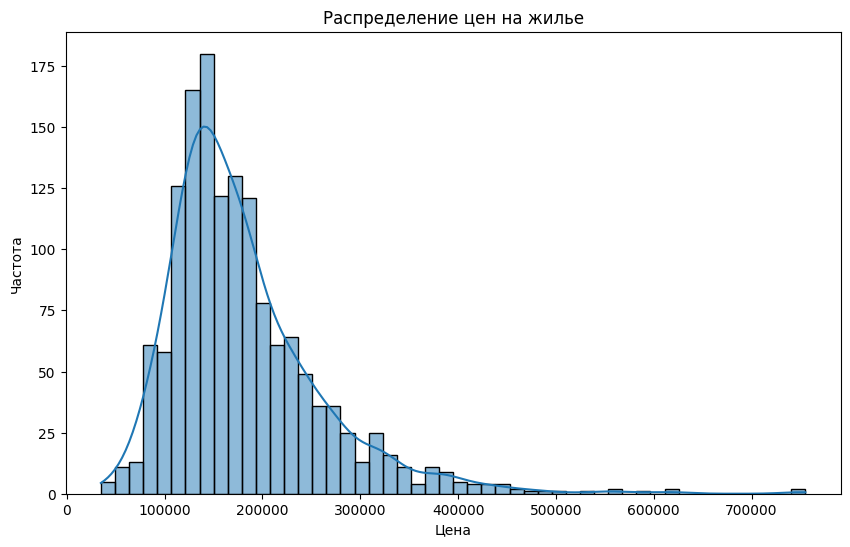

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Загрузка данных
data = pd.read_csv('house/train.csv')

# Обзор данных
print(data.head())
print(data.info())
print(data.describe())

# Определение числовых и категориальных столбцов
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = data.select_dtypes(include=[object]).columns.tolist()

# Преобразование категориальных данных с помощью OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_categories = pd.DataFrame(encoder.fit_transform(data[categorical_columns]))
encoded_categories.columns = encoder.get_feature_names_out(categorical_columns)

# Объединение числовых данных и закодированных категориальных данных
data_encoded = pd.concat([data[numerical_columns], encoded_categories], axis=1)

# Визуализация данных

# Распределение целевой переменной
plt.figure(figsize=(10, 6))
sns.histplot(data_encoded['SalePrice'], bins=50, kde=True)
plt.title('Распределение цен на жилье')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

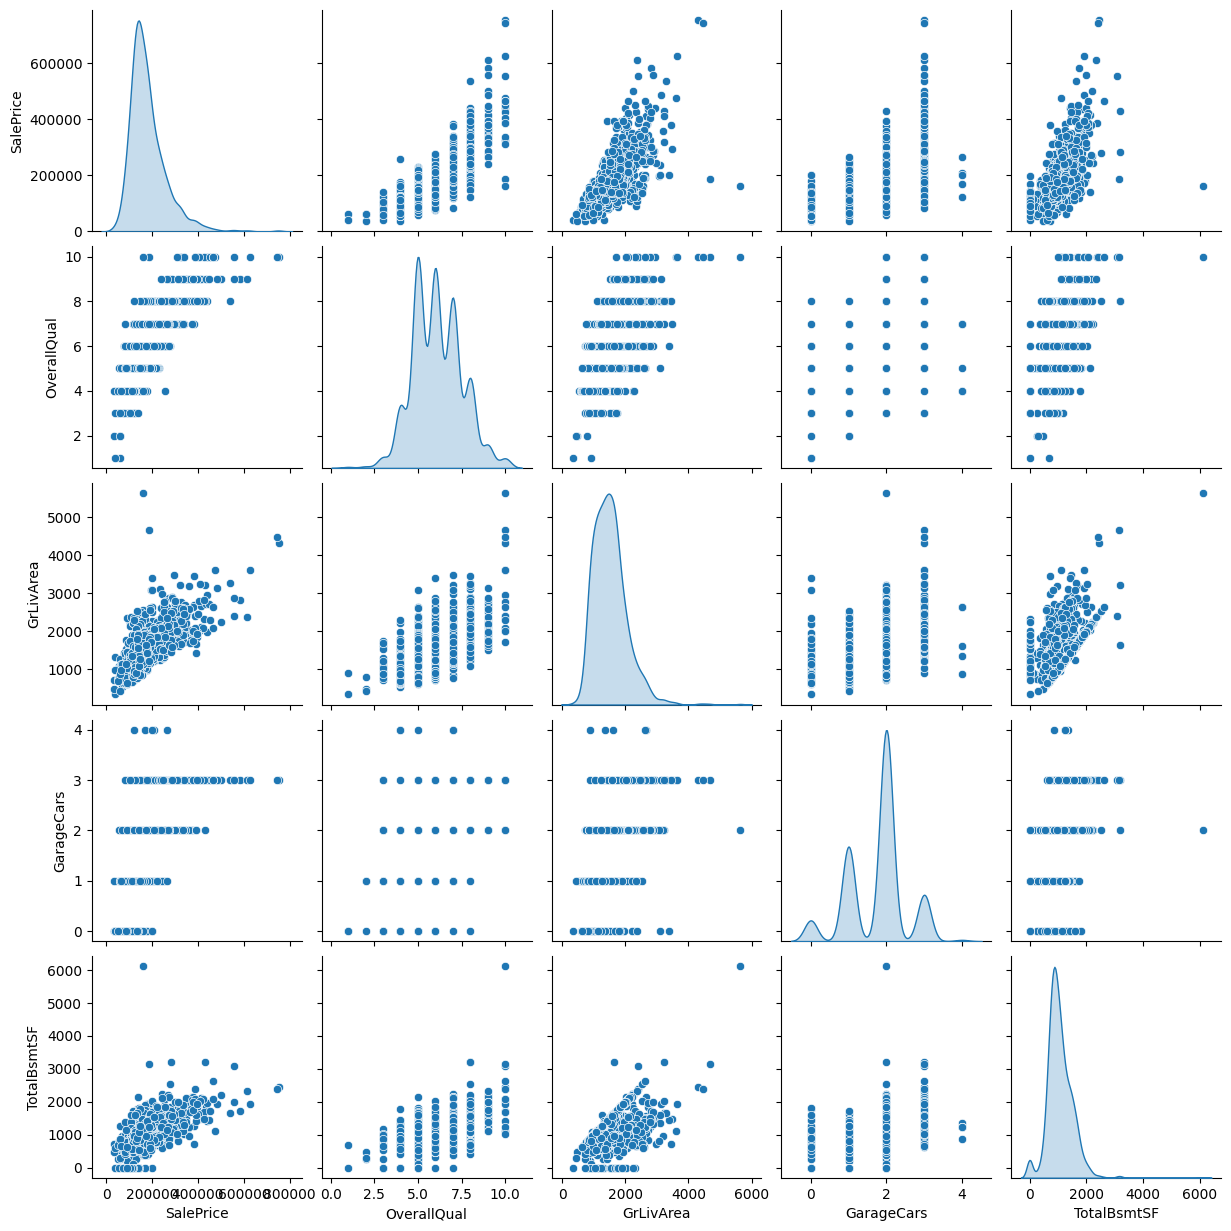

In [4]:
# Парные графики для нескольких переменных
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(data_encoded[features], diag_kind='kde')
plt.show()


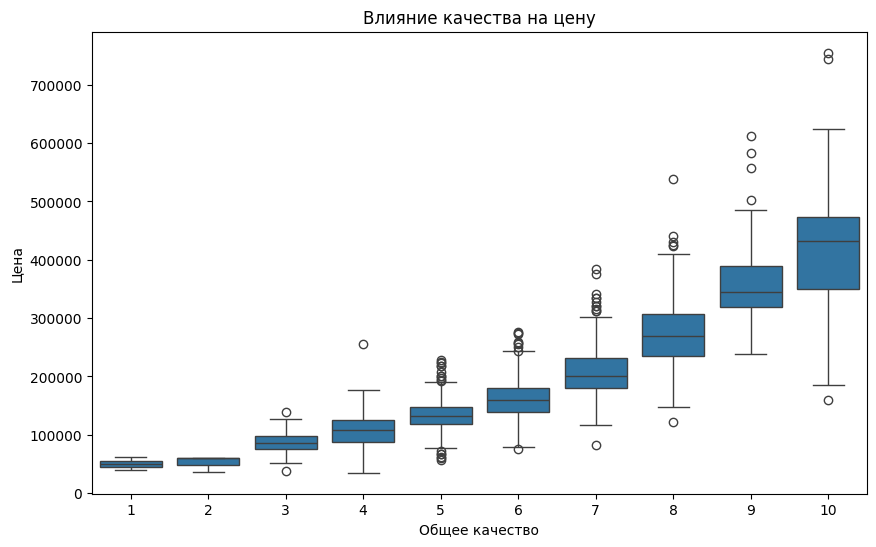

In [5]:
# Влияние различных переменных на цену
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=data_encoded)
plt.title('Влияние качества на цену')
plt.xlabel('Общее качество')
plt.ylabel('Цена')
plt.show()

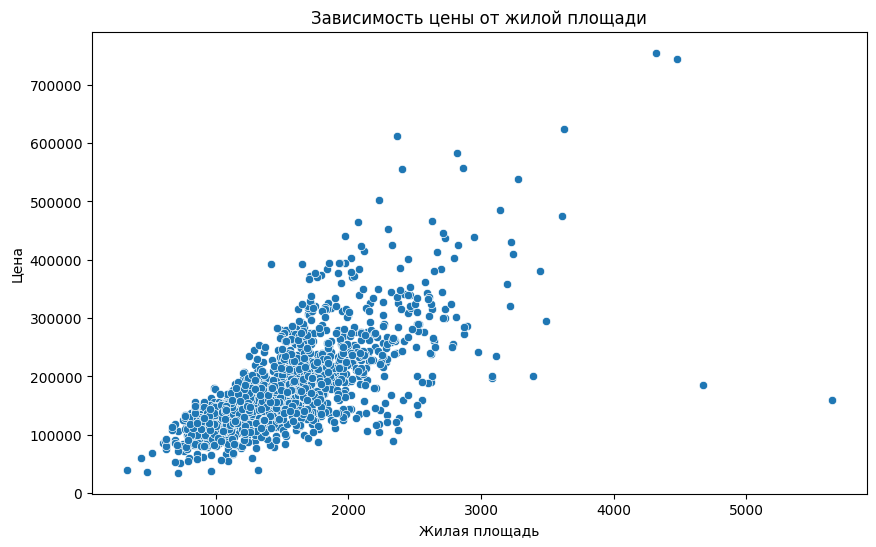

In [6]:
# Распределение жилой площади
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data_encoded)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()

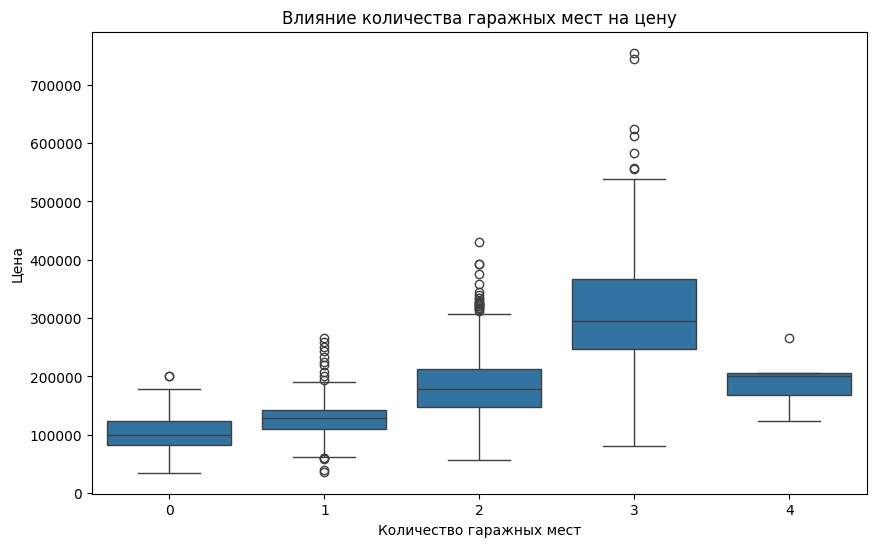

In [7]:
# Распределение цены по количеству гаражных мест
plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=data_encoded)
plt.title('Влияние количества гаражных мест на цену')
plt.xlabel('Количество гаражных мест')
plt.ylabel('Цена')
plt.show()